In [1]:
## Catálogo das Abordagens
#  A1: Cadastro
#  A2: Medidas
#      A2.1: Medidas Importantes
#      A2.2: Select KBeast
#  A3: Estatística
#  A4: Doenças
#      A4.1: Select KBest
#  A5: Doenças sem Hipotensão e Normotenso
#  A6: Escolho Doença
#  A7: Categorias
#  A8: Extratificação Sexo Masculino
#  A9: Extratificação Sexo Feminino
#  A10: Sistólicas
#  A11: Diastólicas
#  A12: Medidas Mais Importantes

In [2]:
#bibliotecas pandas de leitura de arquivos
import pandas as pd
#biblioteca do kmeans
from sklearn.cluster import KMeans
import numpy as np
#avaliar classificacao cluster
#from sklearn.metrics.cluster import adjusted_rand_score
#visualizar graficos
import matplotlib.pyplot as plt
#caracter 
import re
#countar os itens de uma lista
from collections import Counter
#separar treino, teste, validação
from sklearn.model_selection import train_test_split
# métricas de avaliação do K-Means
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
# Método Silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import math
from sklearn import svm

from sklearn_extra.cluster import KMedoids

from IPython.display import Image
from pathlib import Path


#from sklearn_extra.cluster import KMedoids

In [3]:
#!pip install scikit-learn-extra --user

In [4]:
# Definição de diretórios e Disco de leitura dos arquivos (Desktop ou Notebook) 
config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())


DIRETORIO_PRINCIPAL =  DIR_PREFIXO / "Projeto_PA" / "Projeto_PA_validado"
DIR_BASE = DIR_PREFIXO / "Projeto_PA" / "dataset_modificado"
DIR_KMEDOIDS = DIRETORIO_PRINCIPAL / "KMedoids"


In [5]:
#leitura do dataset completo com dados cadastrais, medidas e estatísticas

dataset = pd.read_csv(DIR_BASE / "pacientes_completos_tratados.csv",sep=';', encoding="Latin1")
dataset_apos_tratamento = dataset

#dataset = dataset.drop ("Unnamed: 0", axis=1)
#for i in dataset.columns:
#    print(repr(i))
#

In [6]:
#!pip install scikit-learn-extra

In [7]:
############################### FUNÇÕES ##########################################

#Funções para calcular o melhor numero de cluster(grupos) que seu dataset gerar

def calculate_wcss(data):
    """
    Calcula a soma dos quadrados intra-clusters para 19
    quantidades de clusters, iniciando com o mínimo de 2 clusters
    
    Parametros
    ----------
    data : DataFrame
        conjunto de dados para fazer o `.fit()` do KMeans

    
    Returns
    -------
    wcss : lista contendo os valores de soma de quadrados intra-cluster
    """
    from sklearn_extra.cluster import KMedoids
    wcss = []
    for n in range(2, 21):
        #kmedoids = KMedoids(n_clusters=2, random_state=0,metric='manhattan')
        kmedoids = KMedoids(n_clusters=n, random_state=42, metric='manhattan')
        kmedoids.fit(X=data)
        wcss.append(kmedoids.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    """
    Calcula a maior distância entre os pontos que marcam as 
    somas dos quadrados intra-clusters para 19 calculadas 
    com `calculate_wcss()`
    
    Parametros
    ----------
    wcss : lista
        lista contendo os valores de soma de quadrados intra-cluster

    
    Returns
    -------
    int : número de clusters 
    """
    from math import sqrt
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]

        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances)) + 2

In [8]:
#converter peso em float

#def Tratar_Peso(peso):    
#    
#    try:
#        if peso[-1] == ',' or peso[-1] == '.':
#            peso =  peso[:-1]
#    except:
#        pass
#    
#    
#    try:
#        peso = float(peso)
#    except:
#        peso = float(peso.replace(',','.'))
#    return peso
#
##converter altura
#def Tratar_Altura(altura):       
#       
#    altura = str(altura)
#    if re.match('\d,,\d', altura):
#        altura = altura.replace(',,','')
#    
#    try:
#        if altura[-1] == ',' or altura[-1] == '.' or  altura[-1] == ']':
#            altura =  altura[:-1]
#    except:
#        pass
#    
#    try:
#        altura = float(altura)
#    except:
#        altura = float(altura.replace(',','.'))     
#    
#    # convt 150.00 para 1.50
#    if altura >= 3:
#        altura = altura/100 
#    
#    
#    return altura
#
##calcular o IMC
#def IMC(peso,altura):  
#        
#    imc = float(peso) / (float(altura) ** 2)
#    
#    return np.round (imc, 1)
#
#
##Trocar  True para 1 e False para 0
def verdadeiro_falso(valor):
    if valor == True:
        return 1
    else:
        return 0
#
#def normaliza_float(n):
#    if isinstance(n, (float, int)):
#        return n
#    if isinstance(n, str):
#        if "," in n:
#            n = n.replace(",", ".")
#        if not n.replace(".", "").isdigit():
#            n = "".join(digito for digito in n if digito in "0123456789.")
#        n = n.replace("..", ".")
#        if not n or n.count(".") > 1:
#            n = float("nan")
#         # convt 150.00 para 1.50
#        n = float(n)
#        if n >= 3:
#            while 1:
#                if (n//10 == 0.0 or n//10 == 0):
#                    break
#                else:
#                    n = n/10 
#    return float(n)

In [9]:
dataset_apos_tratamento['IMC']

0        33.2
1        29.4
2        25.8
3        24.2
4        40.6
         ... 
19237    27.5
19238    26.9
19239    33.3
19240    25.0
19241    30.9
Name: IMC, Length: 19242, dtype: float64

In [10]:
# transform Gender M and F to binary 

#limpa_coluna_genero = {"genero": {"M": True, "F": False}}
#controle = 1
#genero0 = dataset['genero']
#for i in range(len(genero0)):
#    if genero0.iloc[i] != 'M' and genero0.iloc[i] != 'F':
#        if controle == 1:
#            genero0.iloc[i] = 0
#            controle = 0
#        else:
#            genero0.iloc[i] = 1
#            controle = 1
#
#dataset_apos_tratamento['genero'] = genero0
#
#dataset_apos_tratamento = dataset_apos_tratamento.replace(limpa_coluna_genero)
#
#dataset_apos_tratamento["genero"] = dataset_apos_tratamento["genero"].astype(int)
##
##
#
genero_M_F = {"genero": {1: "M", 0: "F"}}

##  Tratar os dados para colocá-los em Categorias

In [11]:
# Cálculo do Indice de Massa Corporal:
#         IMC entre 18,0 e 24,9 Kg/m2: normal
#         IMC menor do que 18,0 Kg/m2: baixo peso
#         IMC entre 25,0 e 29,9 Kg/m2: sobrepeso 
#         IMC entre 30,0 e 34,9 Kg/m2: obesidade grau I 
#         IMC entre 35,0 e 39,9 Kg/m2: obesidade grau II 
#         IMC maior do que 40,0 Kg/m2: obesidade grau III  

def faixas_imc(imc):
    classes = ["baixo peso","normal","sobrepeso",
               "obesidade grau I","obesidade grau II","obesidade Grau III"]
    intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]
        
def faixas_imc_classe(imc):
    classes = [1, 2, 3, 4, 5, 6]
    
    intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]
    
def faixas_etarias(idade):
    classes = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]
    intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

def faixas_etarias_classe(idade):
    classes = [1, 2, 3, 4, 5, 6]
    intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

In [12]:
#dataset_apos_tratamento['idade'] = dataset_apos_tratamento['idade'].fillna(-1)
#dataset_apos_tratamento = dataset_apos_tratamento[dataset_apos_tratamento['idade'] != -1]

In [13]:
#dataset_apos_tratamento = dataset_apos_tratamento[dataset_apos_tratamento['altura_normalizada'] <= 2.5]
#dataset_apos_tratamento = pd.concat([dataset_apos_tratamento.loc[:,'numero_identificacao':'altura'],
#                                     dataset_apos_tratamento['IMC'],
#                                    dataset_apos_tratamento.loc[:,'data_exame':'Picos Diastolica']],
#                                    axis=1)
#
#print(len(dataset_apos_tratamento))
## Dataset com IMC e tratamento de Nans com a política de normalização
#dataset_apos_tratamento.to_csv(DIR_BASE / "pacientes_completos_tratados.csv", 
#                        sep=";", encoding="latin1", index=False)
#
#dataset_apos_tratamento.to_csv(DIR_BASE / "pacientes_com_tab.csv", 
#                        sep="\t", encoding="latin1", index=False)

In [14]:
dataset_apos_tratamento.loc[:,'Hipotensao':'Whitecoat']

,Hipotensao,Sistolica Isolada,Diastolica Isolada,Dipping,Non Dipping,Extreme Dipping,Reverse Dipping,Morning Surge,Masked,Whitecoat
0,True,False,False,False,False,False,True,False,False,False
1,True,False,False,False,False,False,True,False,False,False
2,True,False,False,False,True,False,False,False,False,True
3,True,False,False,True,False,False,False,False,False,True
4,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
19237,True,False,False,True,False,False,False,True,False,True
19238,True,False,False,False,True,False,False,False,False,True
19239,True,False,False,False,True,False,False,False,False,True
19240,True,False,False,False,False,True,False,False,False,False


In [15]:
def verdadeiro_falso(valor):
    if valor == True:
        return 1
    else:
        return 0

In [16]:
dataset_por_classes = pd.DataFrame()
dataset_por_classes['numero_identificacao'] = dataset_apos_tratamento['numero_identificacao']
dataset_por_classes['genero'] = dataset_apos_tratamento['genero']
dataset_por_classes['idade'] = dataset_apos_tratamento['idade'].apply(faixas_etarias_classe)
dataset_por_classes['IMC'] = dataset_apos_tratamento['IMC'].apply(faixas_imc_classe)
dataset_por_classes = pd.concat([dataset_por_classes, dataset_apos_tratamento.loc[:,'sist 9:00':'diast 8:45']],axis=1)
for doenca in list(dataset_apos_tratamento.loc[:,'Hipotensao':'Whitecoat'].columns):
    dataset_por_classes[doenca] = dataset_apos_tratamento[doenca].apply(verdadeiro_falso)
dataset_por_classes

,numero_identificacao,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,...,Hipotensao,Sistolica Isolada,Diastolica Isolada,Dipping,Non Dipping,Extreme Dipping,Reverse Dipping,Morning Surge,Masked,Whitecoat
0,4,1,6,4,105.0,108.0,116.0,104.0,106.0,98.0,...,1,0,0,0,0,0,1,0,0,0
1,5,1,4,3,103.0,114.0,82.0,104.0,98.0,106.0,...,1,0,0,0,0,0,1,0,0,0
2,6,1,1,3,147.0,148.0,156.0,140.0,130.0,132.0,...,1,0,0,0,1,0,0,0,0,1
3,7,0,2,2,140.0,139.0,142.0,137.0,135.0,177.0,...,1,0,0,1,0,0,0,0,0,1
4,8,1,2,6,113.0,110.0,101.0,108.0,111.0,111.0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19237,21786,1,3,3,163.0,198.0,172.0,148.0,161.0,156.0,...,1,0,0,1,0,0,0,1,0,1
19238,21787,1,3,3,114.0,120.0,164.0,116.0,119.0,126.0,...,1,0,0,0,1,0,0,0,0,1
19239,21788,0,2,4,107.0,110.0,103.0,105.0,108.0,111.0,...,1,0,0,0,1,0,0,0,0,1
19240,21792,0,4,3,94.0,107.0,112.0,124.0,120.0,94.0,...,1,0,0,0,0,1,0,0,0,0


In [17]:
dataset_apos_tratamento['IMC'].unique

<bound method Series.unique of 0        33.2
1        29.4
2        25.8
3        24.2
4        40.6
         ... 
19237    27.5
19238    26.9
19239    33.3
19240    25.0
19241    30.9
Name: IMC, Length: 19242, dtype: float64>

In [18]:
dataset_apos_tratamento

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,sist 9:00,sist 9:15,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Diferenca % Dipping,Picos Sistolica,Picos Diastolica
0,4,1923-10-05,1,94.0,85.0,160,33.2,2018-09-10 12:25:23,105.0,108.0,...,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,0.966,11,34
1,5,1948-10-07,1,70.0,80.0,165,29.4,2018-12-26 07:39:41,103.0,114.0,...,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,0.969,9,23
2,6,1999-03-23,1,19.0,100.0,197,25.8,2018-12-26 08:06:19,147.0,148.0,...,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,1.056,19,19
3,7,1978-01-26,0,40.0,65.0,"1,64",24.2,2018-12-26 08:19:06,140.0,139.0,...,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,1.107,21,9
4,8,1990-03-07,1,28.0,120.0,172,40.6,2018-12-26 08:26:59,113.0,110.0,...,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,1.137,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19237,21786,1972-11-25,1,47.0,75.0,165,27.5,2020-09-10 16:03:08,163.0,198.0,...,116.0,12224.5,9265.0,2439.0,474.5,18.66,14.80,1.134,49,60
19238,21787,1970-10-19,1,49.0,90.0,183,26.9,2020-09-10 16:21:02,114.0,120.0,...,85.0,10970.0,6819.0,3319.0,738.0,17.22,13.67,1.046,32,27
19239,21788,1985-03-15,0,35.0,93.0,167,33.3,2020-09-10 16:44:53,107.0,110.0,...,62.0,9245.0,4935.5,3556.0,713.5,14.36,8.29,1.029,14,26
19240,21792,1952-04-21,0,68.0,64.0,160,25.0,2020-09-10 17:25:50,94.0,107.0,...,68.0,8989.5,5660.0,2815.5,460.0,14.14,9.38,1.252,19,13


In [19]:
# Dataset com cadastro, IMC e medidas
dataset_cadastro = pd.concat([dataset_apos_tratamento['numero_identificacao'],
                             dataset_apos_tratamento['genero'],dataset_apos_tratamento['idade'],
                             dataset_apos_tratamento['IMC'],
                     dataset_apos_tratamento.loc[:,'sist 9:00':'diast 8:45']],axis=1)

# Dataset com as medidas
dataset_medidas = pd.concat([dataset_apos_tratamento['numero_identificacao'],
                     dataset_apos_tratamento.loc[:,'sist 9:00':'diast 8:45']],axis=1)

# Dataset com numero identificação e estatísticas
dataset_estatistica = pd.concat([dataset_apos_tratamento['numero_identificacao'],
                     dataset_apos_tratamento.loc[:,'Media Sistolica em 24h':'DP Diastolica em 24h']],axis=1)

# Dataset com numero identificação e doenças
dataset_doenca = pd.concat([dataset_apos_tratamento['numero_identificacao'],
                     dataset_apos_tratamento.loc[:,'Hipotensao':'Normotenso']],axis=1)

dataset_masc = dataset_apos_tratamento[dataset_apos_tratamento['genero'] == 1]

dataset_masc_medidas =  pd.concat([dataset_masc['numero_identificacao'],
                     dataset_masc.loc[:,'sist 9:00':'diast 8:45']],axis=1)


dataset_fem = dataset_apos_tratamento[dataset_apos_tratamento['genero'] == 0]

dataset_fem_medidas =  pd.concat([dataset_fem['numero_identificacao'],
                     dataset_fem.loc[:,'sist 9:00':'diast 8:45']],axis=1)

In [20]:
print(f'Quantidade F: {len(dataset_fem_medidas)}\nQuantidade M: {len(dataset_masc_medidas)}')

Quantidade F: 10482
Quantidade M: 8760


# Abordagem 1: Cadastro e Medidas como entrada

In [21]:
dataset_cadastro

,numero_identificacao,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,4,1,94.0,33.2,105.0,108.0,116.0,104.0,106.0,98.0,...,41.0,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0
1,5,1,70.0,29.4,103.0,114.0,82.0,104.0,98.0,106.0,...,74.0,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0
2,6,1,19.0,25.8,147.0,148.0,156.0,140.0,130.0,132.0,...,80.0,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0
3,7,0,40.0,24.2,140.0,139.0,142.0,137.0,135.0,177.0,...,49.0,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0
4,8,1,28.0,40.6,113.0,110.0,101.0,108.0,111.0,111.0,...,64.0,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19237,21786,1,47.0,27.5,163.0,198.0,172.0,148.0,161.0,156.0,...,102.0,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0
19238,21787,1,49.0,26.9,114.0,120.0,164.0,116.0,119.0,126.0,...,87.0,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0
19239,21788,0,35.0,33.3,107.0,110.0,103.0,105.0,108.0,111.0,...,49.0,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0
19240,21792,0,68.0,25.0,94.0,107.0,112.0,124.0,120.0,94.0,...,63.0,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0


In [22]:
#selecionando variaveis de medidad : sist 9:00 a diast 8:45
#campos sist e diast

#   Gera uma lista com cabeçalhos
ls_cadastro = list(dataset_cadastro.loc[:,'genero':'diast 8:45'].columns)

dados_cadastro_sem_id = dataset_cadastro.loc[:,'genero':'diast 8:45']
#dados_sist_diast = dados_sist_diast.drop(['peso','altura','data_exame'],axis=1)

dados_cadastro_sem_id.head(5)

,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,...,diast 6:30,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45
0,1,94.0,33.2,105.0,108.0,116.0,104.0,106.0,98.0,102.0,...,41.0,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0
1,1,70.0,29.4,103.0,114.0,82.0,104.0,98.0,106.0,108.0,...,74.0,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0
2,1,19.0,25.8,147.0,148.0,156.0,140.0,130.0,132.0,121.0,...,80.0,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0
3,0,40.0,24.2,140.0,139.0,142.0,137.0,135.0,177.0,148.0,...,49.0,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0
4,1,28.0,40.6,113.0,110.0,101.0,108.0,111.0,111.0,114.0,...,64.0,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0


## Trata nulos, quando houver

In [23]:
#  ****** trocar a variável de dados_cadastro_sem_id  para  dados_cadastro_sem_nan

#dados_medidas_sem_nan = dados_medidas.fillna(0)

#  Retirar a linha que contém NaN em alguma coluna 
# dados_cadastro_sem_nan = dados_cadastro
# ls_cadastro = list(dados_cadastro_sem_nan.columns)

## Abordagem 1: Número de Clusters gerado pelo k-Means

In [24]:
#calculando a quantidade ótima de clusters (é possivel dividir os pacientes em quantos grupos)
%time sum_of_squares_cadastro = calculate_wcss(dados_cadastro_sem_id)
num_otimo_clusters_cadastro = optimal_number_of_clusters(sum_of_squares_cadastro)
num_otimo_clusters_cadastro

Wall time: 22min 32s


7

In [25]:
#convertendo os dados para a clusterização
dados_cadastro_array = np.array(dados_cadastro_sem_id)

In [26]:
#habilitando o kmeans com 8 grupos (foi calculado na etapa anterior)
kmedoids_cadastro =  KMedoids(n_clusters=num_otimo_clusters_cadastro, random_state=42, metric='manhattan').fit(dados_cadastro_array)

In [27]:
#listar os grupos 
grupos_cadastro = kmedoids_cadastro.fit_predict(dados_cadastro_array)

In [28]:
#incluir grupos nos dados de sist e diast
dados_cadastro_sem_id['grupo'] = grupos_cadastro
dados_cadastro_sem_id['grupo'] = dados_cadastro_sem_id['grupo'] + 1
dados_cadastro_sem_id


,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,...,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45,grupo
0,1,94.0,33.2,105.0,108.0,116.0,104.0,106.0,98.0,102.0,...,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0,6
1,1,70.0,29.4,103.0,114.0,82.0,104.0,98.0,106.0,108.0,...,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0,6
2,1,19.0,25.8,147.0,148.0,156.0,140.0,130.0,132.0,121.0,...,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0,7
3,0,40.0,24.2,140.0,139.0,142.0,137.0,135.0,177.0,148.0,...,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0,7
4,1,28.0,40.6,113.0,110.0,101.0,108.0,111.0,111.0,114.0,...,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19237,1,47.0,27.5,163.0,198.0,172.0,148.0,161.0,156.0,156.0,...,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0,3
19238,1,49.0,26.9,114.0,120.0,164.0,116.0,119.0,126.0,123.0,...,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0,3
19239,0,35.0,33.3,107.0,110.0,103.0,105.0,108.0,111.0,114.0,...,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0,6
19240,0,68.0,25.0,94.0,107.0,112.0,124.0,120.0,94.0,102.0,...,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0,6


## Abordagem 1: O método Elbow

### Esse método para calcular o melhor número de cluster para o algoritmo e mostar o gráfico

### https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/#:~:text=O%20m%C3%A9todo%20Elbow%20se%20trata,um%20valor%20significativo%20de%20ganho.

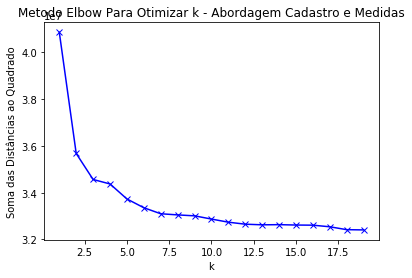

Wall time: 78.8 ms


In [30]:
#metodo de Elbow
Sum_of_squared_distances = []
K = range(1,20)

for k in K:
    km = KMedoids(n_clusters=k, metric='manhattan')
    km = km.fit(dados_cadastro_array)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma das Distâncias ao Quadrado')
plt.title('Metodo Elbow Para Otimizar k - Abordagem Cadastro e Medidas')
fig = plt.gcf() 
fig.savefig( DIR_KMEDOIDS / 'graficos' / f'metodoelbow_cadastro.svg', format="svg")
%time plt.show()

In [31]:
#fig.savefig('D:\Projeto_PA\\Projeto_PA_validado\\KMeansRandom\\graficos\\grafico_metodoelbow_medidas.svg', format='svg')
#plt.savefig(DIR_NMF / f'NMF_classificado_{grupo}.svg',format="svg")
#fig.savefig('diastolica_sistolica/diast_sist_elbow.png', format='png')


## Abordagem 1: Silhouette

####  A análise da Silhouette pode ser usada para determinar o grau de separação entre os clusters. O coeficiente de Silhouette quando próximo de +1, indica que os pontos estão muito longe dos pontos do outro cluster, e quando próximo de 0, indica que os pontos então muito perto ou até interseccionando um outro cluster



Para n_clusters = 2 O score_silhouette medio e : 0.21285740931724015
Para n_clusters = 3 O score_silhouette medio e : 0.09268146489102036
Para n_clusters = 4 O score_silhouette medio e : 0.057585646053083715
Para n_clusters = 5 O score_silhouette medio e : 0.04124141029733947
Para n_clusters = 6 O score_silhouette medio e : 0.024120125295536428
Para n_clusters = 7 O score_silhouette medio e : 0.02680896055531955
Para n_clusters = 8 O score_silhouette medio e : 0.025713054434355235


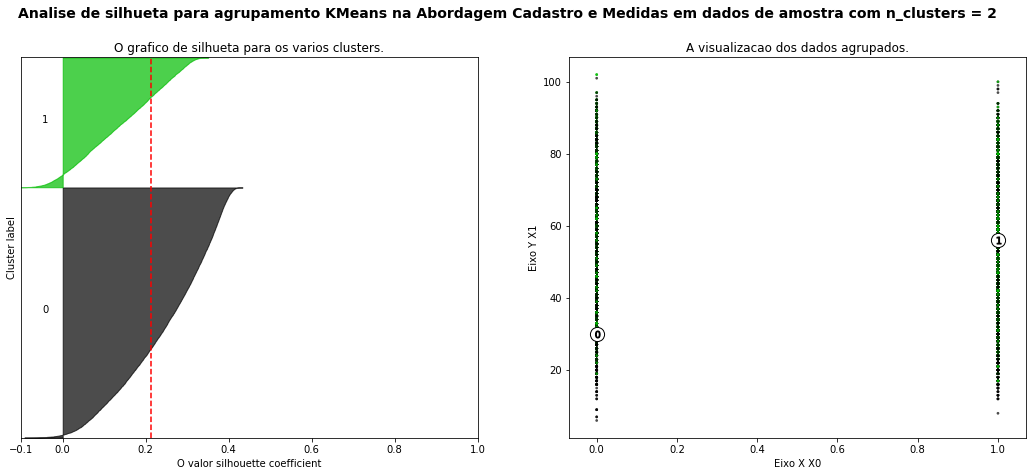

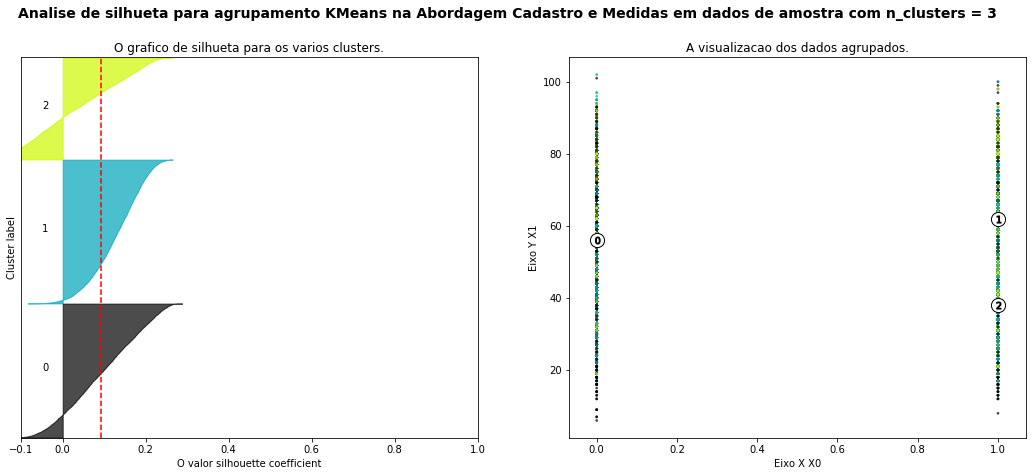

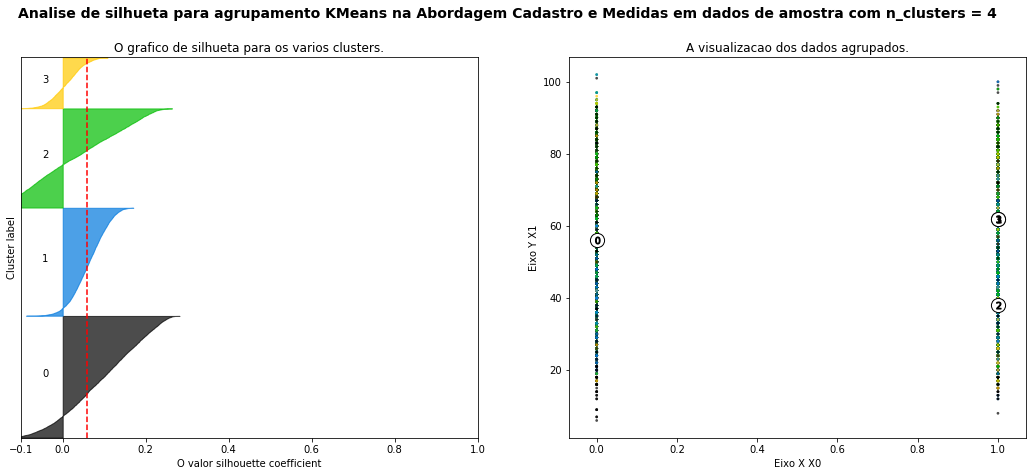

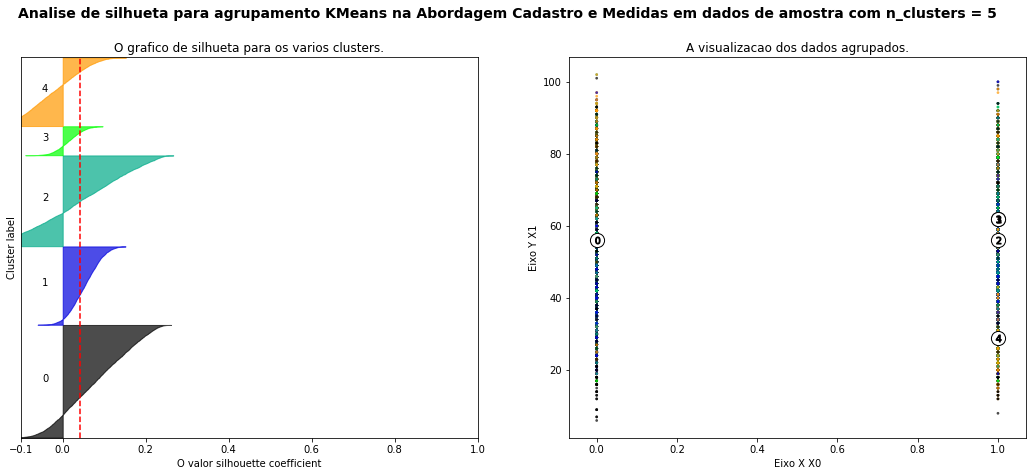

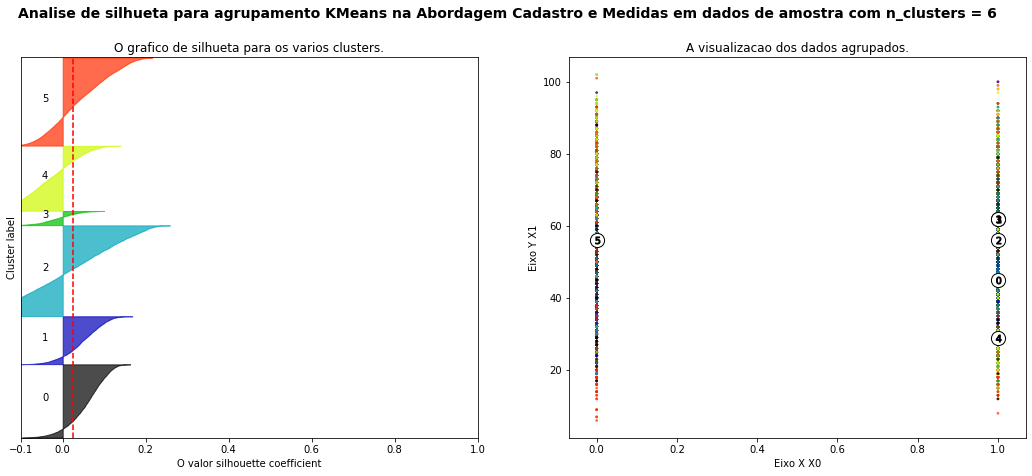

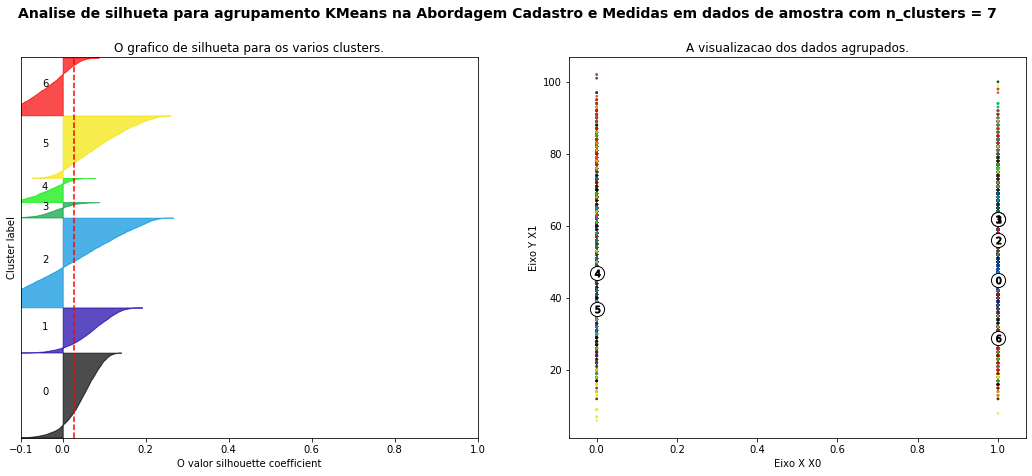

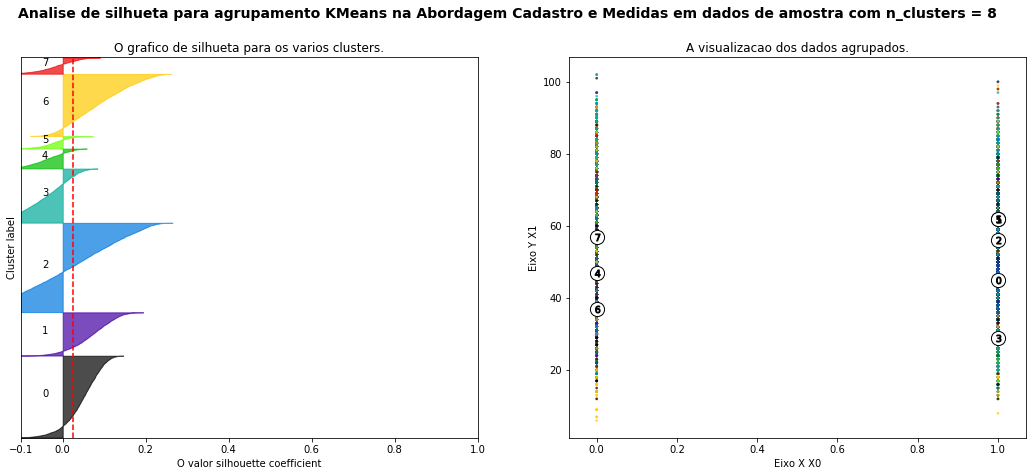

In [32]:
#Silhouette
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in range_n_clusters:    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # O 1st subplot é o grafico silhouette
    # O coeficiente silhouette  um range de -1, 1 but in this example all
    # Os exemplos vão ficar em [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # O (n_clusters + 1) * 10 é para inserir um espaço em branco entre a silhueta
    # Para gerar destaque
    ax1.set_ylim([0, len(dados_cadastro_array) + (n_clusters + 1) * 10])
    # Inicialize o clusterer com o valor n_clusters e um valor aleatorio
    # seed 10.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    clusterer = KMedoids(n_clusters=n_clusters, random_state=42, metric='manhattan')
    cluster_labels = clusterer.fit_predict(dados_cadastro_array)
# O silhouette_score fornece o valor médio para todas as amostras.
    # Isso dá uma perspectiva sobre a densidade e separação das formas
    # clusters
    #  Cálculo de toda a matriz que entra no cálculo do Silhouette
    silhouette_avg = silhouette_score(dados_cadastro_array, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "O score_silhouette medio e :", silhouette_avg)
    # Calcule as pontuações da silhueta para cada amostra
    sample_silhouette_values = silhouette_samples(dados_cadastro_array, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregue as pontuações de silhueta para amostras pertencentes a
        # cluster i, e classifica-los
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,       alpha=0.7)
        # Rotule os gráficos de silhueta com seus números de cluster no meio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcule o novo y_lower para o próximo gráfico
        y_lower = y_upper + 10  #10 para as 0 amostras
    ax1.set_title("O grafico de silhueta para os varios clusters.")
    ax1.set_xlabel("O valor silhouette coefficient")
    ax1.set_ylabel("Cluster label")
    # A linha vertical para a pontuação média da silhueta de todos os valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Limpar os yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2º gráfico mostrando os clusters reais formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dados_cadastro_array[:, 0], dados_cadastro_array[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling dos clusters
    centers = clusterer.cluster_centers_
    # Desenhe círculos brancos nos centros do cluster
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("A visualizacao dos dados agrupados.")
    ax2.set_xlabel("Eixo X X0")
    ax2.set_ylabel("Eixo Y X1")
    plt.suptitle(("Analise de silhueta para agrupamento KMeans na Abordagem Cadastro e Medidas em dados de amostra "
                  "com n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    fig = plt.gcf()
    fig.savefig( DIR_KMEDOIDS / 'graficos' / f'metodosilhouette_cadastro_{n_clusters}.svg', format="svg")
    
plt.show()

#fig.savefig('diast_sist_kmeans.png', format='png')

### Não existe um valor de k clusters que não esteja se intersectando 

In [33]:
#dataset com grupos e com os dados de cadastro e medidas
# nume id, data exame, idade, peso, altura, medidas, 22 estaitsticos, 11 doenças em cada grupo 
dataset_s_d = dataset_apos_tratamento.loc[:,'numero_identificacao':'altura']
dataset_s_d['IMC'] = dataset_cadastro['IMC']
dataset_s_d['grupo'] = grupos_cadastro
dataset_s_d = pd.concat([dataset_s_d,dataset_apos_tratamento.loc[:,'sist 9:00':'Picos Diastolica']],axis=1)
dataset_s_d

# Salva dataset com dados completos após o K-Means com abordagem 1 (cadastro e medidas)
dataset_s_d.to_csv(path_or_buf = DIR_KMEDOIDS / "padrao_doenca" / 'mapa_apos_kmedoids_cadastro.csv', 
             sep=';',index=False,encoding='UTF-8')

In [34]:
dataset_s_d.head()

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,grupo,sist 9:00,sist 9:15,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Diferenca % Dipping,Picos Sistolica,Picos Diastolica
0,4,1923-10-05,1,94.0,85.0,160,33.2,5,105.0,108.0,...,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,0.966,11,34
1,5,1948-10-07,1,70.0,80.0,165,29.4,5,103.0,114.0,...,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,0.969,9,23
2,6,1999-03-23,1,19.0,100.0,197,25.8,6,147.0,148.0,...,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,1.056,19,19
3,7,1978-01-26,0,40.0,65.0,"1,64",24.2,6,140.0,139.0,...,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,1.107,21,9
4,8,1990-03-07,1,28.0,120.0,172,40.6,0,113.0,110.0,...,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,1.137,10,11


## Abordagem 1: Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
#parametro simples do modelo
%time random_forest_cadastro = RandomForestClassifier(n_estimators=50)

Wall time: 0 ns


In [37]:
#base para modelo

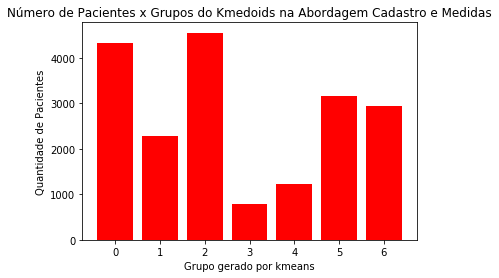

In [38]:
classes = []
qtds = []

contagem = Counter(grupos_cadastro)

for i in range(0,num_otimo_clusters_cadastro):
    classes.append(i)
    qtds.append(contagem[i])

plt.bar(classes,qtds,color="red")
plt.xticks(classes)
plt.ylabel('Quantidade de Pacientes')
plt.xlabel('Grupo gerado por kmeans')
plt.title('Número de Pacientes x Grupos do Kmedoids na Abordagem Cadastro e Medidas')
fig = plt.gcf()
fig.savefig(DIR_KMEDOIDS / 'graficos' / 'grafico_Random_Abordagem1_pacientes_por_grupos.svg',format="svg")
plt.show()


In [39]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

#separar train(75%) - 14.485, test (10%) - 7.726  and validation (15%) - 11.588
#  O parâmetro random_state=42 garante o rastreio do numero de identificação
x_train, x_test, y_train, y_test = train_test_split(dados_cadastro_array, grupos_cadastro, test_size=1 - train_ratio,random_state=42)
x_val, x_test, y_val, y_test = train_test_split(dados_cadastro_array, grupos_cadastro, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42)

In [40]:
#treino
random_forest_cadastro.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

#### Abordagem 1: VALIDAÇÃO

In [41]:
#calcular acuracia, recall e f1
y_prev_val = random_forest_cadastro.predict(x_val)

accuracy = accuracy_score(y_val, y_prev_val)
recall = recall_score(y_val, y_prev_val,average='macro')
f1 = f1_score(y_val, y_prev_val,average='macro')

In [42]:
print('Accuracy: '+str(accuracy)+' - Recall: '+str(recall)+' - F1 Score: '+str(f1))

Accuracy: 1.0 - Recall: 1.0 - F1 Score: 1.0


In [43]:
#Matriz de Confusão
mat=list(confusion_matrix(y_val, y_prev_val, labels=classes))
pd.DataFrame(mat,index = classes, columns = classes)

,0,1,2,3,4,5,6
0,2583,0,0,0,0,0,0
1,0,1340,0,0,0,0,0
2,0,0,2764,0,0,0,0
3,0,0,0,490,0,0,0
4,0,0,0,0,747,0,0
5,0,0,0,0,0,1888,0
6,0,0,0,0,0,0,1733


#### Abordagem 1: TESTE

In [44]:
#calcular acuracia, recall e f1
y_prev_test = random_forest_cadastro.predict(x_test)

accuracy = accuracy_score(y_test, y_prev_test)
recall = recall_score(y_test, y_prev_test,average='macro')
f1 = f1_score(y_test, y_prev_test,average='macro')

In [45]:
print('Accuracy: '+str(accuracy)+' - Recall: '+str(recall)+' - F1 Score: '+str(f1))

Accuracy: 0.8668312329479018 - Recall: 0.7748503974782445 - F1 Score: 0.8093988577839613


In [46]:
#Matriz da Confusão
mat=list(confusion_matrix(y_test, y_prev_test, labels=classes))
pd.DataFrame(mat,index = classes, columns = classes)

,0,1,2,3,4,5,6
0,1612,47,3,1,0,60,8
1,136,685,89,2,3,1,28
2,0,15,1750,0,0,0,20
3,103,12,5,138,1,9,23
4,71,29,30,1,231,14,93
5,82,0,0,0,0,1196,0
6,42,25,56,1,5,10,1060


In [47]:
dataset_s_d.describe()
dados_cadastro_array.shape
dados_cadastro_sem_id

,genero,idade,IMC,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,sist 10:15,sist 10:30,...,diast 6:45,diast 7:00,diast 7:15,diast 7:30,diast 7:45,diast 8:00,diast 8:15,diast 8:30,diast 8:45,grupo
0,1,94.0,33.2,105.0,108.0,116.0,104.0,106.0,98.0,102.0,...,46.0,51.0,56.0,61.0,67.0,61.0,69.0,62.0,51.0,6
1,1,70.0,29.4,103.0,114.0,82.0,104.0,98.0,106.0,108.0,...,74.0,74.0,70.0,67.0,63.0,60.0,74.0,70.0,67.0,6
2,1,19.0,25.8,147.0,148.0,156.0,140.0,130.0,132.0,121.0,...,86.0,93.0,91.0,89.0,87.0,86.0,87.0,82.0,82.0,7
3,0,40.0,24.2,140.0,139.0,142.0,137.0,135.0,177.0,148.0,...,56.0,62.0,83.0,104.0,99.0,94.0,89.0,90.0,72.0,7
4,1,28.0,40.6,113.0,110.0,101.0,108.0,111.0,111.0,114.0,...,73.0,83.0,93.0,68.0,91.0,87.0,84.0,81.0,72.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19237,1,47.0,27.5,163.0,198.0,172.0,148.0,161.0,156.0,156.0,...,114.0,126.0,125.0,124.0,123.0,123.0,121.0,119.0,123.0,3
19238,1,49.0,26.9,114.0,120.0,164.0,116.0,119.0,126.0,123.0,...,73.0,59.0,74.0,68.0,86.0,96.0,107.0,106.0,93.0,3
19239,0,35.0,33.3,107.0,110.0,103.0,105.0,108.0,111.0,114.0,...,50.0,50.0,53.0,52.0,62.0,68.0,61.0,64.0,60.0,6
19240,0,68.0,25.0,94.0,107.0,112.0,124.0,120.0,94.0,102.0,...,63.0,64.0,76.0,72.0,69.0,75.0,74.0,69.0,67.0,6


In [48]:
#salvar dataframe numero_paciente, grupo_real, grupo, previsto validação
x_train_, x_test_, y_train_, y_test_ = train_test_split(dataset_s_d, grupos_cadastro, test_size=1 - train_ratio, random_state=42)
x_val_, x_test_, y_val_, y_test_ = train_test_split(dataset_s_d, grupos_cadastro, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42)

#validacao
pacientes_validacao_diast_sisto = x_val_[['numero_identificacao']]
pacientes_validacao_diast_sisto['Grupo_Real'] = y_val_
pacientes_validacao_diast_sisto['Grupo_Previsto'] = y_prev_val

pacientes_validacao_diast_sisto.to_csv(path_or_buf = DIR_KMEDOIDS / "padrao_doenca" / 'pacientes_validacao_cadastro.csv', 
             sep=';',index=False,encoding='UTF-8')

#teste
pacientes_teste_diast_sisto = x_test_[['numero_identificacao']]
pacientes_teste_diast_sisto['Grupo_Real'] = y_test_
pacientes_teste_diast_sisto['Grupo_Previsto'] = y_prev_test

pacientes_teste_diast_sisto.to_csv(path_or_buf = DIR_KMEDOIDS / "padrao_doenca" / 'pacientes_teste_cadastro.csv', 
             sep=';',index=False,encoding='UTF-8')


c:\users\marta\anaconda3\envs\emoti\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

#### Abordagem 1: Importância das Features Random Forest

In [49]:
len(ls_cadastro), len(random_forest_cadastro.feature_importances_)

(167, 167)

In [50]:
#calculo da importancia de cada variavel para idenficar os grupos com 3 casas decimais
importancia = pd.DataFrame({'features':ls_cadastro,'importance':np.round(random_forest_cadastro.feature_importances_,3)})
importancia = importancia.sort_values('importance',ascending=False)

#importances.to_excel('diastolica_sistolica/features_sisto_diasto.xlsx')

importancia.to_csv(path_or_buf = DIR_KMEDOIDS / "padrao_doenca" / 'importancia_features_cadastro.csv', 
             sep=';',index=False,encoding='UTF-8')

importancia

,features,importance
6,sist 9:45,0.014
49,sist 20:30,0.014
126,diast 19:15,0.012
56,sist 22:15,0.012
92,diast 10:45,0.011
...,...,...
22,sist 13:45,0.004
161,diast 7:30,0.003
1,idade,0.002
2,IMC,0.002


# Abordagem 7: por Categorias 

In [51]:
#convertendo os dados para entrega ao Random - Classifcação

#ls_classes = list(dataset_por_classes.loc[:,'genero':].columns)

ls_classes = list((dataset_por_classes.drop(list(dataset_por_classes.loc[:,'sist 9:00':'diast 8:45'].columns),axis=1)).drop('numero_identificacao',axis=1).columns)

array_classes = np.array(dataset_por_classes[ls_classes])
print (dataset_por_classes)
#calculando a quantidade ótima de clusters (é possivel dividir os pacientes em quantos grupos)
sum_of_squares = calculate_wcss(array_classes)
n_classes = optimal_number_of_clusters(sum_of_squares)
print (n_classes)

       numero_identificacao  genero  idade  IMC  sist 9:00  sist 9:15  \
0                         4       1      6    4      105.0      108.0   
1                         5       1      4    3      103.0      114.0   
2                         6       1      1    3      147.0      148.0   
3                         7       0      2    2      140.0      139.0   
4                         8       1      2    6      113.0      110.0   
...                     ...     ...    ...  ...        ...        ...   
19237                 21786       1      3    3      163.0      198.0   
19238                 21787       1      3    3      114.0      120.0   
19239                 21788       0      2    4      107.0      110.0   
19240                 21792       0      4    3       94.0      107.0   
19241                 21793       1      3    4      111.0      104.0   

       sist 9:30  sist 9:45  sist 10:00  sist 10:15  ...  Hipotensao  \
0          116.0      104.0       106.0        98.0

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with 

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with 

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with 

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with 

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with 

2


In [52]:
#   habilitando o k-means com "optimal_number_of_clusters" grupos (calculado na etapa anterior)

#kmeans_classes = KMeans(n_clusters=n_classes, random_state=42).fit(array_classes)
kmedoids_classes = KMedoids(n_clusters=n_classes, random_state=42, metric='manhattan').fit(array_classes)


#listar os grupos 

grupos_classes = kmedoids_classes.fit_predict(array_classes)


grupos_classes

c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
c:\users\marta\anaconda3\envs\emoti\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:279: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
#  Inclui a coluna Grupo no dataset que será gravado no final
dataset_por_classes['grupo'] = grupos_classes 
dataset_por_classes['grupo'] = dataset_por_classes['grupo'] + 1

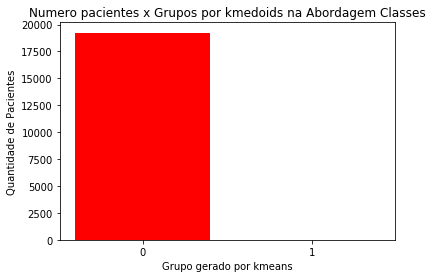

In [54]:
from sklearn.ensemble import RandomForestClassifier

#parametro simples do modelo
random_forest_classes = RandomForestClassifier(n_estimators=50)

#base para modelo
classes = []
qtds = []

contagem = Counter(grupos_classes)

for i in range(0,n_classes):
    classes.append(i)
    qtds.append(contagem[i])

plt.bar(classes,qtds,color="red")
plt.xticks(classes)
plt.ylabel('Quantidade de Pacientes')
plt.xlabel('Grupo gerado por kmeans')
plt.title('Numero pacientes x Grupos por kmedoids na Abordagem Classes')
fig = plt.gcf()
fig.savefig(DIR_KMEDOIDS / 'graficos' / 'grafico_Random_AbordagemClasses_doenca_por_grupos.svg',format="svg")
plt.show()

In [55]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# Feature Selection
x_train, x_test, y_train, y_test = train_test_split(array_classes, grupos_classes, test_size=1 - train_ratio,random_state=42)

# Feature Selection
x_val, x_test, y_val, y_test = train_test_split(array_classes, grupos_classes, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42)

# Aplicação do modelo Random Forest no conjunto de dados de treino
random_forest_classes.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [56]:
#### Abordagem 7: VALIDAÇÃO

#calcular acuracia, recall e f1
y_prev_val = random_forest_classes.predict(x_val)

accuracy = accuracy_score(y_val, y_prev_val)
recall = recall_score(y_val, y_prev_val,average='macro')
f1 = f1_score(y_val, y_prev_val,average='macro')

print('Accuracy: '+str(accuracy)+' - Recall: '+str(recall)+' - F1 Score: '+str(f1))

#Matriz de Confusão
mat=list(confusion_matrix(y_val, y_prev_val, labels=classes))
pd.DataFrame(mat,index = classes, columns = classes)

Accuracy: 1.0 - Recall: 1.0 - F1 Score: 1.0


,0,1
0,11545,0
1,0,0


In [57]:
#### Abordagem 7: TESTE

#calcular acuracia, recall e f1
y_prev_test = random_forest_classes.predict(x_test)

accuracy = accuracy_score(y_test, y_prev_test)
recall = recall_score(y_test, y_prev_test,average='macro')
f1 = f1_score(y_test, y_prev_test,average='macro')

print('Accuracy: '+str(accuracy)+' - Recall: '+str(recall)+' - F1 Score: '+str(f1))

#Matriz de Confusão
mat=list(confusion_matrix(y_test, y_prev_test, labels=classes))
pd.DataFrame(mat,index = classes, columns = classes)

Accuracy: 1.0 - Recall: 1.0 - F1 Score: 1.0


,0,1
0,7697,0
1,0,0


In [58]:
# Importância para Categorias

importancia = pd.DataFrame({'features':ls_classes,'importance':np.round(random_forest_classes.feature_importances_,3)})

importancia = importancia.sort_values('importance',ascending=False)

importancia.to_csv(path_or_buf = DIR_KMEDOIDS / "padrao_doenca" / 'importancia_features_categoria.csv', 
             sep=';',index=False,encoding='UTF-8')

importancia

,features,importance
0,genero,0.0
1,idade,0.0
2,IMC,0.0
3,Hipotensao,0.0
4,Sistolica Isolada,0.0
5,Diastolica Isolada,0.0
6,Dipping,0.0
7,Non Dipping,0.0
8,Extreme Dipping,0.0
9,Reverse Dipping,0.0


# Função para gravar os outputs

In [59]:
def gera_arquivos_por_grupo(todos_dados_grupo, abordagem):
    grupos = list(set(todos_dados_grupo['grupo'].values))
    
    todos_dados_grupo.to_csv(DIR_KMEDOIDS / f"KMEDOIDS_approach_{abordagem}_todos_pacientes.csv", 
                        sep=";", encoding="latin1", index=False)
    
    for grupo in grupos:
        df_grupo = todos_dados_grupo[todos_dados_grupo['grupo'] == grupo]
        df_grupo.to_csv(DIR_KMEDOIDS / f"KMEDOIDS_approach_{abordagem}_grupo_{grupo}.csv", 
                        sep=";", encoding="latin1", index=False)
    true_false_1_0 = {True:1, False:0}
    for doenca in list(todos_dados_grupo.loc[:,'Hipotensao':'Normotenso'].columns):
        todos_dados_grupo.loc[:,doenca] = todos_dados_grupo.loc[:,doenca].replace(true_false_1_0)
    
    todos_dados_grupo.to_csv(DIR_KMEDOIDS / f"KMEDOIDS_approach_{abordagem}_compara_todos_pacientes.csv", 
                        sep=";", encoding="latin1", index=False)

##  Grava arquivo da abordagem 1 - Cadastro e Medidas

In [60]:
dados_completos_cadastro = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    dataset_padrao_doenca['grupo'],
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

genero_M_F = {"genero": {1: "M", 0: "F"}}
dados_completos_cadastro = dados_completos_cadastro.replace(genero_M_F)

NameError: name 'dataset_padrao_doenca' is not defined

In [ ]:
gera_arquivos_por_grupo(dados_completos_cadastro,'cadastro')

In [ ]:
dados_completos_cadastro[dados_completos_cadastro['grupo'] == 2]

##   Grava arquivo da abordagem 7: CATEGORIAS

In [ ]:
#def gera_arquivos_por_grupo(todos_dados_grupo):
#    grupos = list(set(todos_dados_grupo['grupo'].values))
#    
#    for grupo in grupos:
#        df_grupo = todos_dados_grupo[todos_dados_grupo['grupo'] == grupo]
#        df_grupo.to_csv(DIR_KMEANS / f"KMEANS_approach_classes_grupo_{grupo}.csv", 
#                        sep=";", encoding="latin1", index=False)
#
#
##gera_arquivos_por_grupo(todos_dados_grupo)

In [ ]:
dados_completos_classes = pd.concat([dataset_apos_tratamento.loc[:,:'data_exame'],
                                    dataset_por_classes['grupo'],
                                    dataset_apos_tratamento.loc[:,'sist 9:00':]],
                                   axis=1)

genero_M_F = {"genero": {1: "M", 0: "F"}}
dados_completos_classes = dados_completos_classes.replace(genero_M_F)

In [ ]:
#gera_arquivos_por_grupo(dados_completos_classes)

In [ ]:
gera_arquivos_por_grupo(dados_completos_classes,'classes')

In [ ]:
gera_arquivos_por_grupo(df_medidas_importantes,'medidas_importantes')